# Solar Panel Segmentation from Aerial imagery



## Loading Libraries

In [ ]:
!pip install onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.7 MB/s eta 0:00:00


## Loading Data

In [ ]:
# config.yaml format
# path: /content/solar_residential_data/yolo/
# train: images/train
# val: images/val


# nc: 1
# names: ['solar panel']

In [ ]:
# Use this to download dataset from kaggle

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download rafayqayyum/satellite-solar-panel-segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp gdrive/MyDrive/yolo.zip .

In [ ]:
!unzip yolo.zip

Archive:  yolo.zip
   creating: yolo/
   creating: yolo/images/
   creating: yolo/images/train/
  inflating: yolo/images/train/PV01_324942_1203839.bmp  
  inflating: yolo/images/train/PV01_324942_1203842.bmp  
  inflating: yolo/images/train/PV01_324951_1203795.bmp  
  inflating: yolo/images/train/PV01_324956_1203801.bmp  
  inflating: yolo/images/train/PV01_324958_1203801.bmp  
  inflating: yolo/images/train/PV01_324972_1203798.bmp  
  inflating: yolo/images/train/PV01_324972_1203801.bmp  
  inflating: yolo/images/train/PV01_324981_1203795.bmp  
  inflating: yolo/images/train/PV01_325119_1204074.bmp  
  inflating: yolo/images/train/PV01_325120_1203763.bmp  
  inflating: yolo/images/train/PV01_325120_1204226.bmp  
  inflating: yolo/images/train/PV01_325120_1204229.bmp  
  inflating: yolo/images/train/PV01_325120_1204232.bmp  
  inflating: yolo/images/train/PV01_325122_1203763.bmp  
  inflating: yolo/images/train/PV01_325122_1203834.bmp  
  inflating: yolo/images/train/PV01_325122_120384

## Loading & Training the model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8l-seg.pt")  # load a pretrained model

# Use the model
model.train(data="config.yaml", epochs=20)  # train the model

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=config.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

## Evaluating on validation set

In [ ]:
## Download the run/segment/val directory to check the validation results/metrics
## run/segment/train will contain training results/metrics and model weights


metrics = model.val()  # evaluate model performance on the validation set


Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients
val: Scanning /content/yolo/labels/val.cache... 100 images, 9 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.89s/it]
                   all        100        659      0.914      0.948      0.976      0.838      0.911      0.944      0.975      0.782
Speed: 5.3ms preprocess, 52.0ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/segment/val


## Getting a prediction

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.5 source=/content/yolo/images/val/PV01_324951_1203793.bmp save=true

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients

image 1/1 /content/yolo/images/val/PV01_324951_1203793.bmp: 640x640 1 solar, 76.3ms
Speed: 3.0ms preprocess, 76.3ms inference, 289.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict



0: 640x640 5 solars, 87.9ms
Speed: 3.9ms preprocess, 87.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


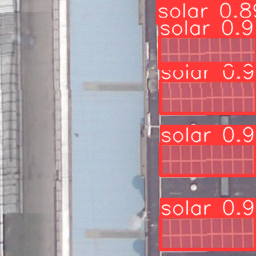

In [ ]:
from PIL import Image
import cv2
import numpy as np
img = cv2.imread('/content/yolo/images/val/PV01_325333_1205369.bmp')
results = model (img,conf=0.3)
Image.fromarray(results[0].plot()[:, :, ::-1])


## Saving the results to drive

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!scp -r /content/runs /content/gdrive/MyDrive/solar_seg_resultss

## Saving the model in ONNX format

In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
model.export(format="onnx")

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients

PyTorch: starting from 'runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (88.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 234.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 19.7s, saved as 'runs/segment/train/weights/best.onnx' (175.4 MB)

Export complete (33.3s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=runs/segment/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=segment model=runs/segment/train/weights/best.onnx imgsz=640 data=config.yaml 
Visualize:       https://netron.app


'runs/segment/train/weights/best.onnx'